<a href="https://colab.research.google.com/github/lazuwarda/NLP/blob/main/Proyek_Model_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYEK NLP DICODING

Nama: Naufatul Lazuwarda

ID Dicocing: Naufalazuwarda

E-mail: naufalazuwarda@gmail.com

Dataset : Reddit dataset

link: https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset/data

In [ ]:
import pandas as pd
import tensorflow as tf

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/lazuwarda/NLP/main/Reddit_Data.csv')
df

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  449


In [ ]:
df.isna().sum()

clean_comment    100
category           0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df=df.dropna()

In [ ]:
df['category']= df['category'].replace([-1,0,1],['negative', 'neutral', 'positive'])

<ipython-input-271-5f7ab57ca377>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category']= df['category'].replace([-1,0,1],['negative', 'neutral', 'positive'])


In [ ]:
ctg= pd.get_dummies(df.category)
new_df=pd.concat([df,ctg], axis=1)
new_df=new_df.drop(columns='category')
new_df

,clean_comment,negative,neutral,positive
0,family mormon have never tried explain them t...,0,0,1
1,buddhism has very much lot compatible with chr...,0,0,1
2,seriously don say thing first all they won get...,1,0,0
3,what you have learned yours and only yours wha...,0,1,0
4,for your own benefit you may want read living ...,0,0,1
...,...,...,...,...
37244,jesus,0,1,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,0,0,1
37246,downvote karna tha par upvote hogaya,0,1,0
37247,haha nice,0,0,1


In [ ]:
x=new_df['clean_comment'].values
y=new_df[['negative','neutral','positive']].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='<oov>')
tokenizer.fit_on_texts(x_train)

sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_test = tokenizer.texts_to_sequences(x_test)

pad_train= pad_sequences(sequence_train,
                         padding='post',
                         maxlen=75,
                         truncating='post')
pad_test = pad_sequences(sequence_test,
                         padding='post',
                         maxlen=75,
                         truncating='post')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics= 'accuracy')

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nAkurasi  Validation telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
hist = model.fit(pad_train,
                 y_train,
                 validation_data=(pad_test,y_test),
                 epochs=15,
                 verbose=1,
                 callbacks=[callbacks],
                 batch_size=64)

Epoch 1/15
460/460 [==============================] - 89s 186ms/step - loss: 0.8103 - accuracy: 0.6388 - val_loss: 0.6140 - val_accuracy: 0.7258
Epoch 2/15
460/460 [==============================] - 84s 184ms/step - loss: 0.5377 - accuracy: 0.7616 - val_loss: 0.5208 - val_accuracy: 0.7954
Epoch 3/15
460/460 [==============================] - 89s 195ms/step - loss: 0.3987 - accuracy: 0.8507 - val_loss: 0.4562 - val_accuracy: 0.8428
Epoch 4/15
460/460 [==============================] - 88s 192ms/step - loss: 0.3278 - accuracy: 0.8844 - val_loss: 0.3972 - val_accuracy: 0.8674
Epoch 5/15
460/460 [==============================] - 80s 174ms/step - loss: 0.2985 - accuracy: 0.8973 - val_loss: 0.3985 - val_accuracy: 0.8636
Epoch 6/15
460/460 [==============================] - 84s 183ms/step - loss: 0.2498 - accuracy: 0.9140 - val_loss: 0.3395 - val_accuracy: 0.8837
Epoch 7/15
460/460 [==============================] - 81s 176ms/step - loss: 0.1982 - accuracy: 0.9372 - val_loss: 0.3443 - val_ac

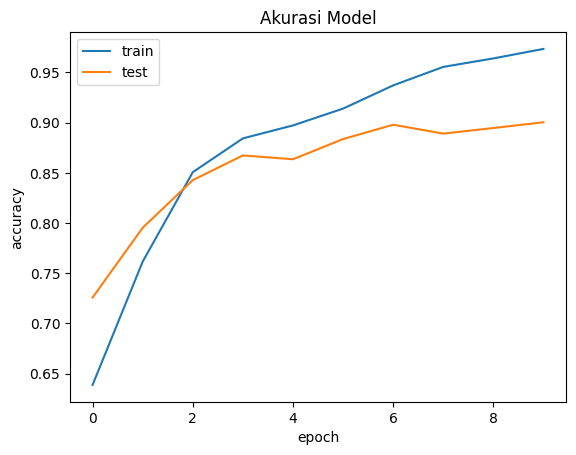

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()